In [107]:
# import dataset

import numpy as np
import pandas as pd

# image = "../input/h-and-m-personalized-fashion-recommendations/images"
train = "../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv"
articles = "../input/h-and-m-personalized-fashion-recommendations/articles.csv"
customers = "../input/h-and-m-personalized-fashion-recommendations/customers.csv"
transactions = "../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv"
submission = "../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv"

In [108]:
customers = pd.read_csv(customers)
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [77]:
def create_df(url:str) -> pd.DataFrame:
    df = pd.read_csv(url)
    return df

def get_article_id(df:pd.DataFrame, ids:pd.Series) -> pd.DataFrame:
    df['article_id'] = ["0" + str(id) for id in ids]
    return df

In [70]:
# articles

articles = create_df(articles)
ids = articles['article_id']
articles = get_article_id(articles, ids)
articles.head()

NameError: name 'create_df' is not defined

In [16]:
# EDA : articles

# What product do they have the most : Top N

import seaborn as sns
import matplotlib.pyplot as plt

def val_cnt(df:pd.DataFrame, col:str, top_n:int):
    plt.figure(figsize = (10, 6))
    sns.set(style = 'whitegrid')
    _order = df[col].value_counts()[:top_n].index
    viz = sns.countplot(x = col, data = df,
                        order = _order)
    plt.xticks(rotation = 45)
    plt.show()
    
# What index account for the most? : Pie chart

def pie_chart(df:pd.DataFrame, col:str):
    _cnt_of_col = df[col].value_counts()
    _name_cnt = [tuple((x, y)) for x, y in _cnt_of_col.items()]
    _vals = [val[1] for val in _name_cnt]
    _label = [val[0] for val in _name_cnt]
    plt.pie(_vals, labels = _label,
            radius = 1.5, autopct = "%0.2f%%")
    plt.show()
    
# What's the portion of index_group_name for each garment_group

def portion(df:pd.DataFrame, y:str, hue:str):
    _f, _ax = plt.subplots(figsize = (10, 10))
    _ax = sns.histplot(data=df, y=y, hue=hue, multiple="stack")
    plt.show()
    
# data structure : index_name, index_group_name

def hierarchy(df:pd.DataFrame, cols:list) -> pd.Series:
    _res = df.groupby(cols).count()['article_id']
    return _res

In [78]:
# Customer

customers = create_df(customers)
customers.head()

TypeError: argument of type 'method' is not iterable

In [54]:
# EDA : Customer

# How many Active Customers?
# How many club member status in Avtive?

def cust_ratio(df:pd.DataFrame, col:str, check_val):
    _total = df.shape[0]
    _target = df[df[col] == check_val].shape[0]
    return round((_target/_total) * 100, 2)

# How many people receive fashion news by frequency?

customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace('None', 'NONE')

def pie_chart(df:pd.DataFrame, col:str):
    _cnt_of_col = df[col].value_counts()
    _colname_cnt = [tuple((x, y)) for x, y in _cnt_of_col.items()]
    
    _cnt_no_response = df[col].isna().sum()
    tuple_val = tuple(('No Response', _cnt_no_response))
    _colname_cnt.append(tuple_val)

    _vals = [val[1] for val in _colname_cnt]
    _labels = [val[0] for val in _colname_cnt]
    
    plt.pie(_vals, labels = _labels, radius = 1.5, autopct = "%0.2f%%")
    plt.show()
    
# How old customers overall?

customers = customers.dropna(axis = 0)
def distribution(df:pd.DataFrame, col:str):
    df[col] = df[col].astype(int)
    df[col].plot.hist()
    plt.show()
    
# How many people active in club member?

customers['club_member_status'].value_counts()
customers['fashion_news_frequency'].value_counts()

Regularly    461629
Monthly         792
NONE            490
Name: fashion_news_frequency, dtype: int64

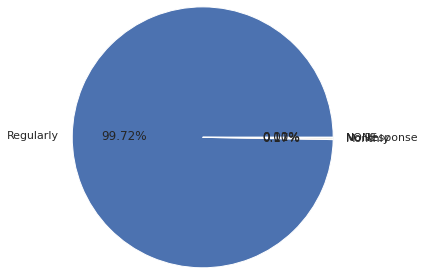

In [53]:
pie_chart(customers, 'fashion_news_frequency')

In [4]:
# relationship with age & club_member_status
# hypothesis : As you get older, you're not likely active in club member

# number of club_member_status by age

num_status_by_age = customers.groupby(['club_member_status'])['age'].value_counts().reset_index(name = 'number of status')
num_status_by_age.head()

,club_member_status,age,number of status
0,ACTIVE,21.0,65487
1,ACTIVE,20.0,53633
2,ACTIVE,24.0,53472
3,ACTIVE,23.0,52409
4,ACTIVE,25.0,52351


In [8]:
active = num_status_by_age[num_status_by_age['club_member_status'] == 'ACTIVE']
active

,club_member_status,age,number of status
0,ACTIVE,21.0,65487
1,ACTIVE,20.0,53633
2,ACTIVE,24.0,53472
3,ACTIVE,23.0,52409
4,ACTIVE,25.0,52351
...,...,...,...
79,ACTIVE,98.0,6
80,ACTIVE,94.0,3
81,ACTIVE,96.0,3
82,ACTIVE,97.0,3


In [10]:
import scipy.stats as stats

age = active['age'].tolist()
num_of_cust = active['number of status'].tolist()

corr, _ = stats.pearsonr (age, num_of_cust)
corr

-0.8090693717035676

In [11]:
active.corr()

,age,number of status
age,1.000000,-0.809069
number of status,-0.809069,1.000000


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

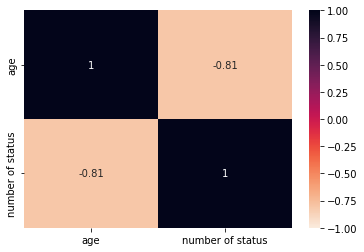

In [27]:
sns.heatmap(active.corr(), vmin = -1, vmax = 1, annot = True, cmap = "rocket_r")
plt.show()

In [109]:
# relationship with age & fashion_news_frequency

age_and_frequency = customers[['age', 'fashion_news_frequency']]
age_and_frequency.head()

,age,fashion_news_frequency
0,49.0,NONE
1,25.0,NONE
2,24.0,NONE
3,54.0,NONE
4,52.0,Regularly


In [114]:
age_and_frequency.dropna(axis = 0, subset = ['age'], inplace = True)

# nan -> no response
# 'NONE' -> 'None'


/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [115]:
age_and_frequency.fillna('No Response', inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [118]:
# number
age_and_frequency['fashion_news_frequency'] = age_and_frequency['fashion_news_frequency'].replace('NONE', 'None')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
age_and_frequency = age_and_frequency.groupby(['age'])['fashion_news_frequency'].value_counts().reset_index(name = 'frequency_status')

In [125]:
# Hypothesis : As you get older, you're not likely to have regular frequency_status
age_and_frequency[age_and_frequency['fashion_news_frequency'] == 'Regularly'].corr()

,age,frequency_status
age,1.000000,-0.794788
frequency_status,-0.794788,1.000000


In [66]:
# EDA : Transaction
transactions = create_df(transactions)
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [70]:
# How's the distribution of price

def price_distribution(df:pd.DataFrame, col:str):
    df[col].plot.hist()
    plt.show()
    
# Which channel do they use the most?

def channel_frequency(df:pd.DataFrame, col:str):
    res = df[col].value_counts()
    return res

# Which products do they buy the most?(top N)

def loyal_cust(df:pd.DataFrame, col:str, top_n:int):
    top_n_cust = df[col].value_counts()[:top_n]
    return top_n_cust

# Take a look at price by sub group of product

articles_df = articles[['article_id','index_name', 'product_group_name']]

transactions_df = transactions[['article_id', 'price']]
ids = transactions_df['article_id']
transactions_df = get_article_id(transactions_df, ids)

merge_df = transactions_df.merge(articles_df, on='article_id')
merge_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,article_id,price,index_name,product_group_name
0,0663713001,0.050831,Lingeries/Tights,Underwear
1,0663713001,0.049475,Lingeries/Tights,Underwear
2,0663713001,0.050831,Lingeries/Tights,Underwear
3,0663713001,0.050831,Lingeries/Tights,Underwear
4,0663713001,0.050831,Lingeries/Tights,Underwear


In [75]:
loyal_cust(transactions, 'article_id', 10)

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
464297007    25025
372860002    24458
610776001    22451
399223001    22236
706016003    21241
Name: article_id, dtype: int64

In [76]:
# How's the mean price for each product by index_name?

def mean_price(df:pd.DataFrame, groupby_col:str):
    
    res = df.groupby(groupby_col)['price'].mean().reset_index()
    res = res.sort_values(by = 'price', ascending = False)

    sns.set_style('darkgrid')
    f,ax = plt.subplots(figsize = (10, 5))
    ax = sns.barplot(x = res.price, y = res.index_name, color = 'pink', alpha = 0.8)
    plt.show()

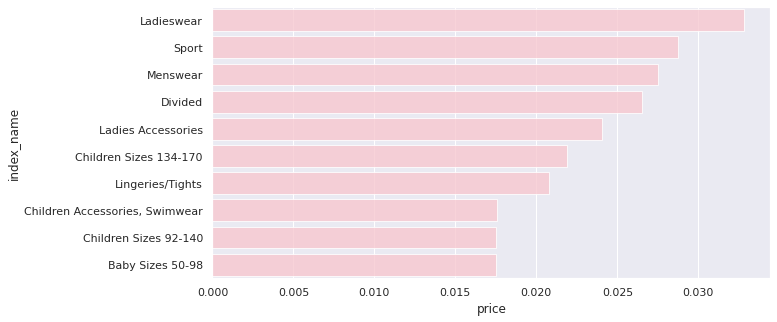

In [77]:
mean_price(merge_df, 'index_name')

In [ ]:
# EDA : image

import os, sys
import glob
from PIL import Image
import matplotlib.pyplot as plt

path = '../input/h-and-m-personalized-fashion-recommendations/images'

f_lst = []
for filename in os.listdir(path):
    res = os.path.join(path, filename)
    for file in os.listdir(res):
        f_lst.append(file)

for article_id in articles['article_id']:
    folder = article_id[:3]
    img = f'{article_id}.jpg'
    if img in f_lst:
        path = f'../input/h-and-m-personalized-fashion-recommendations/images/{folder}/{img}'
        res = Image.open(path)
        plt.imshow(res)
        break